# Probability Based

In [1]:
import re,time,random
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.pyplot import xscale,yscale,title,plot
from functools import reduce
from operator import mul,add

In [2]:
fs="wikizh/std_wikis"
fl="wikizh/std_wikil"

In [3]:
wikis=open(fs,encoding='utf-8',errors='ignore').read()

In [4]:
len(wikis)

89083942

In [5]:
wikis[:100]

'<doc id="5064250" url="https://zh.wikipedia.org/wiki?curid=5064250" title="塞缪尔·J·兰德尔">\n塞缪尔·J·兰德尔\n\n塞缪'

In [6]:
pattern='<.*?>'
wikis=re.sub(pattern,'',wikis)
# 预处理：繁简转化，去除doc标签，去除回车符

In [7]:
len(wikis)

71834783

In [8]:
wikis[:100]

'\n塞缪尔·J·兰德尔\n\n塞缪尔·杰克逊·兰德尔是美国民主党政治家，于19世纪下半叶担任宾夕法尼亚州联邦众议员，曾是第33任众议院议长，并两次参与党派美国总统候选人提名的竞争。\n\n兰德尔生于费城辉格党政'

In [9]:
def tokenize(string): 
    return ''.join(re.findall('[\w|\d]+', string))

In [10]:
wikis=tokenize(wikis)

In [11]:
len(wikis)

62032917

In [12]:
wikis[:100]

'塞缪尔J兰德尔塞缪尔杰克逊兰德尔是美国民主党政治家于19世纪下半叶担任宾夕法尼亚州联邦众议员曾是第33任众议院议长并两次参与党派美国总统候选人提名的竞争兰德尔生于费城辉格党政治世家在辉格党消亡后加入民'

## Unigram

In [13]:
all_counts=Counter(wikis)
all_counts.most_common()

[('的', 1482667),
 ('1', 1061774),
 ('0', 787091),
 ('年', 725667),
 ('2', 682448),
 ('在', 493886),
 ('一', 468905),
 ('人', 456118),
 ('为', 449617),
 ('9', 445761),
 ('国', 444065),
 ('中', 432361),
 ('是', 429151),
 ('于', 396842),
 ('e', 340012),
 ('大', 325411),
 ('a', 304791),
 ('5', 302377),
 ('有', 296777),
 ('3', 294367),
 ('月', 291112),
 ('8', 286682),
 ('和', 280819),
 ('4', 269121),
 ('6', 269007),
 ('日', 268171),
 ('7', 260109),
 ('o', 249461),
 ('i', 246463),
 ('后', 237189),
 ('以', 230707),
 ('会', 230684),
 ('n', 227925),
 ('公', 223712),
 ('r', 220723),
 ('了', 217860),
 ('部', 216977),
 ('学', 213481),
 ('区', 212561),
 ('斯', 211089),
 ('时', 207583),
 ('地', 206704),
 ('出', 197685),
 ('t', 196009),
 ('成', 193869),
 ('个', 187530),
 ('上', 184798),
 ('他', 182409),
 ('西', 180419),
 ('里', 177266),
 ('名', 175628),
 ('尔', 173421),
 ('行', 170412),
 ('作', 167400),
 ('第', 165912),
 ('与', 165745),
 ('不', 164122),
 ('方', 163912),
 ('位', 159977),
 ('s', 159788),
 ('发', 159212),
 ('l', 157676),
 ('由',

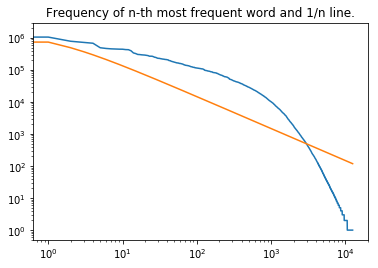

In [14]:
yscale('log'); xscale('log'); 
title('Frequency of n-th most frequent word and 1/n line.')
M=all_counts.most_common()[0][1]
plot([c for (w, c) in all_counts.most_common()])
plot([M/i for i in range(1, len(all_counts)+1)])
plt.show()

In [15]:
def get_prob_from_counts(count):
    all_occurences=sum(count.values())
    def get_prob(item):
        return count[item]/all_occurences
    return get_prob
get_char_prob=get_prob_from_counts(all_counts)
# all_occurence只计算一次，而且不会像全局变量一样容易受到影响

In [16]:
get_char_prob('塞')

0.0003042094570532609

In [17]:
def get_running_time(func,arg,times):
    start_time=time.time()
    for _ in range(times):
        func(arg)
    print('{} used time is {}'.format(func.__name__,time.time()-start_time))

In [18]:
random_chars=random.sample(wikis,1000)
get_running_time(get_char_prob,'缪',10000)

get_prob used time is 0.018343687057495117


In [19]:
def get_char_probability(char):
    all_occurences=sum(all_counts.values())
    return all_counts[char]/all_occurences

In [20]:
get_running_time(get_char_probability,'缪',10000)

get_char_probability used time is 5.488724708557129


In [21]:
def prob_of_string(string):
    return reduce(mul,[get_char_prob(c) for c in string])

In [22]:
prob_of_string("这是一个常见的测试用例")

1.9273694208686607e-31

In [23]:
prob_of_string("这是一个罕见的测试用例")

1.4435755007090523e-32

## 2-Gram

In [24]:
gram_len=2
two_gram_counts=Counter(wikis[i:i+gram_len] for i in range(len(wikis)-gram_len))

In [25]:
two_gram_counts.most_common()[:20]

[('20', 320890),
 ('19', 241125),
 ('01', 226738),
 ('00', 173009),
 ('年1', 96757),
 ('10', 94945),
 ('一个', 82220),
 ('18', 81087),
 ('位于', 80201),
 ('公里', 77127),
 ('人口', 75611),
 ('16', 74201),
 ('6年', 71833),
 ('12', 71540),
 ('15', 68917),
 ('0年', 68747),
 ('11', 68547),
 ('7年', 67984),
 ('17', 66190),
 ('中国', 65943)]

In [26]:
get_pair_prob=get_prob_from_counts(two_gram_counts)                              

In [27]:
get_pair_prob("人口")

0.0012188851676565578

In [34]:
def get_2_gram_prob(word,prev):
    if get_pair_prob(word+prev)>0:
        return get_pair_prob(word+prev)/get_char_prob(prev)
    else:
        return get_char_prob(word)

def get_2_gram_string_prob(string):
    probabilities=[]
    for i,c in enumerate(string):
        prev= '<s>' if i==0 else string[i-1]
        probabilities.append(get_2_gram_prob(c,prev))
    return reduce(mul,probabilities)
        

In [29]:
pair1 = """前天晚上吃晚饭的时候
前天晚上吃早饭的时候""".split('\n')
pair2 = """前天早上吃晚饭的时候
前天早上吃早饭的时候""".split('\n')
pairs =[pair1, pair2]

In [30]:
def get_prob_prefromance(language_model_func, pairs):
    for (p1, p2) in pairs:
        print('{} with probability {}'.format(p1, language_model_func(tokenize(p1))))
        print('{} with probability {}'.format(p2, language_model_func(tokenize(p2))))

In [35]:
get_prob_prefromance(get_2_gram_string_prob, pairs)
# P(晚|吃)>P(早|吃)
# 所以pair1里第一句话对，第二句话错，而pair2相反

前天晚上吃晚饭的时候 with probability 9.092159719916698e-33
前天晚上吃早饭的时候 with probability 7.133266864828677e-34
前天早上吃晚饭的时候 with probability 1.3373228296276825e-31
前天早上吃早饭的时候 with probability 1.0491985317047941e-32


## A glimpse of Machine Learning

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [5]:
df=pd.read_csv("./data/titanic_train.csv")

In [39]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df=df.dropna()

In [7]:
af=df[['Age','Fare']]

In [8]:
age_fare=af[(af['Age']>22) & (af['Fare']>130) & (af['Fare']<400)]

In [9]:
age_fare.head()

,Age,Fare
88,23.0,263.0000
118,24.0,247.5208
195,58.0,146.5208
268,58.0,153.4625
269,35.0,135.6333


In [27]:
def model(x,a,b):
    return a*x+b
def loss(yt,yh):
    return np.mean(np.abs(yt-yh))

In [34]:
a=1
b=0
eps=20
batch=0
learning_rate=1e-2
min_loss=float('inf')
directions=[(1,1),(1,-1),(-1,-1),(-1,1)]

In [35]:
age=np.array(age_fare['Age'].tolist())
fare=np.array(age_fare['Fare'].tolist())
yhat=np.array([model(x,a,b) for x in age])

In [36]:
while True:
    if loss(yt=fare,yh=yhat)<eps:break
    indices = np.random.choice(range(len(age)), size=10)
    sample_x = age[indices]
    sample_y = fare[indices]
    new_a,new_b=a,b
    for d in directions:
        da,db=d
        if min_loss!=float('inf'):
            atmp=a+da*min_loss*learning_rate
            btmp=b+db*min_loss*learning_rate
        else:
            atmp=a+da
            btmp=b+db
        ytmp=np.array([model(x,atmp,btmp) for x in sample_x])
        loss_tmp=loss(sample_y,ytmp)
      
        if loss_tmp<min_loss:
            min_loss=loss_tmp
            new_a,new_b=atmp,btmp
    total=10000
    if batch%100==0:
        print('batch {}/ {} fare = {} * age + {}, with loss: {}'.format(batch, total, a, b, loss_tmp))
    if batch>total:break
    batch+=1
    a,b=new_a,new_b

batch 0/ 10000 fare = 1 * age + 0, with loss: 211.4426052535
batch 100/ 10000 fare = 4.007678775028056 * age + -0.41909220102805544, with loss: 91.142869113043
batch 200/ 10000 fare = 4.007678775028056 * age + -0.41909220102805544, with loss: 51.07743323278565
batch 300/ 10000 fare = 4.007678775028056 * age + -0.41909220102805544, with loss: 84.03182124123673
batch 400/ 10000 fare = 4.007678775028056 * age + -0.41909220102805544, with loss: 102.43511458400594
batch 500/ 10000 fare = 4.007678775028056 * age + -0.41909220102805544, with loss: 36.17312794012868
batch 600/ 10000 fare = 4.007678775028056 * age + -0.41909220102805544, with loss: 72.02366737918952
batch 700/ 10000 fare = 4.007678775028056 * age + -0.41909220102805544, with loss: 71.18161884592693
batch 800/ 10000 fare = 4.007678775028056 * age + -0.41909220102805544, with loss: 53.16320083194232
batch 900/ 10000 fare = 3.7686722759055935 * age + -0.6580987001505183, with loss: 41.842710489735644
batch 1000/ 10000 fare = 3.768

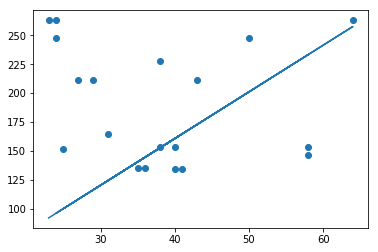

In [37]:
plt.scatter(age, fare)
plt.plot(age, [model(x, a, b) for x in age])
plt.show()